In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
!cp '/content/drive/My Drive/data.csv' ./

In [ ]:
import pandas as pd
data = pd.read_csv('data.csv')

In [ ]:
data = data.drop('Unnamed: 0',axis=1)

In [ ]:
target = data['target']
data = data.drop('target',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 77)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  28000
X_test:  12000
y_train:  28000
y_test:  12000


In [ ]:
# This was a 500 DT code. Change to 1000DT.
from sklearn.ensemble import ExtraTreesClassifier
extc1 = ExtraTreesClassifier(n_estimators=1000, random_state=7,n_jobs=-1)
extc1.fit(X_train,y_train)
y_extc1 = extc1.predict(X_test)

Extra Tree accuracy score:  0.993
Extra Tree confusion matrix heatmap: 



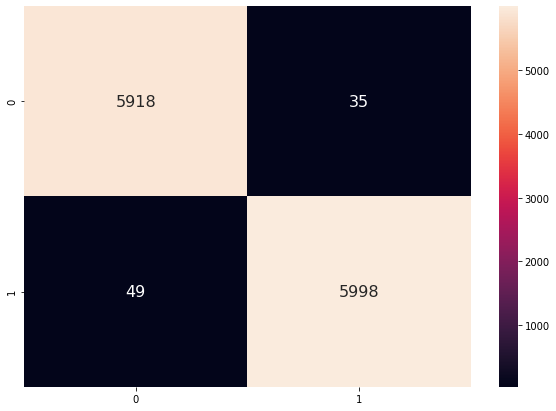

Extra Tree classification report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5967
           1       0.99      0.99      0.99      6033

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [ ]:
print('Extra Tree accuracy score: ',accuracy_score(y_test,y_extc1))
print('Extra Tree confusion matrix heatmap: \n')
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_extc1, y_test),annot=True, annot_kws={"size": 16},fmt = "d")
plt.show()
print('Extra Tree classification report \n',classification_report(y_test, y_extc1))

In [ ]:
# This is cross validation with 100 DT, and 10 fold cv repeated 3 times. Change to 1000 DT
from sklearn.ensemble import ExtraTreesClassifier
extc = ExtraTreesClassifier(n_estimators=1000, random_state=77)
#extc.fit(X_train,y_train)
#_extc = extc.predict(X_test)

Accuracy: Mean -> 0.991 Standard Deviation -> 0.000


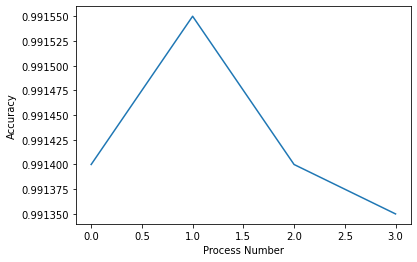

In [ ]:
from numpy import mean,std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=77)
cvscores = cross_val_score(extc, data, target, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
plt.plot(cvscores)
plt.xlabel('Process Number')
plt.ylabel('Accuracy')
print('Accuracy: Mean -> %.3f Standard Deviation -> %.3f' % (mean(cvscores), std(cvscores)))

Using gridsearch to find out the best n_estimators.


In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"n_estimators": [10, 50, 100, 500, 1000]}
model_et = ExtraTreesClassifier(random_state=77,n_jobs=-1)
# without cv
gridswocv = GridSearchCV(model_et,grid,verbose=3)

In [ ]:
gridswocv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   4.9s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   4.1s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   4.1s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   4.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   4.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  17.8s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  18.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  17.6s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 47.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            oob_score=False, random_state=77,
                                            verbose=0, warm_start=False),
             iid='deprecated

In [ ]:
gridswocv.cv_results_

{'mean_fit_time': array([  4.05967379,  17.507301  ,  34.45093889, 171.54671369,
        340.71992331]),
 'mean_score_time': array([0.13237858, 0.23233399, 0.31295691, 1.13430567, 2.15929456]),
 'mean_test_score': array([0.98653571, 0.99110714, 0.99092857, 0.99142857, 0.99153571]),
 'param_n_estimators': masked_array(data=[10, 50, 100, 500, 1000],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 500},
  {'n_estimators': 1000}],
 'rank_test_score': array([5, 3, 4, 2, 1], dtype=int32),
 'split0_test_score': array([0.98571429, 0.99160714, 0.99071429, 0.99142857, 0.99125   ]),
 'split1_test_score': array([0.9875    , 0.99089286, 0.99125   , 0.99160714, 0.99178571]),
 'split2_test_score': array([0.98678571, 0.99017857, 0.99035714, 0.99142857, 0.99196429]),
 'split3_test_score': array([0.98678571, 0.99160714, 0.99107143, 0.99071429, 

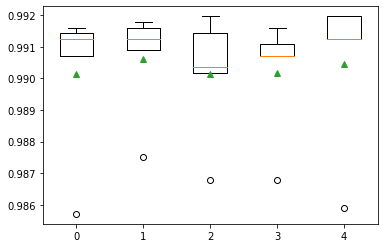

In [ ]:
results = []
names = []
for i in range(0,5):
  stri = 'split'+str(i)+'_test_score'
  names.append(str(i))
  results.append(gridswocv.cv_results_[stri])
plt.boxplot(results,labels = names, showmeans=True)
plt.show()

Extra Tree accuracy score:  0.9924166666666666
Extra Tree confusion matrix heatmap: 



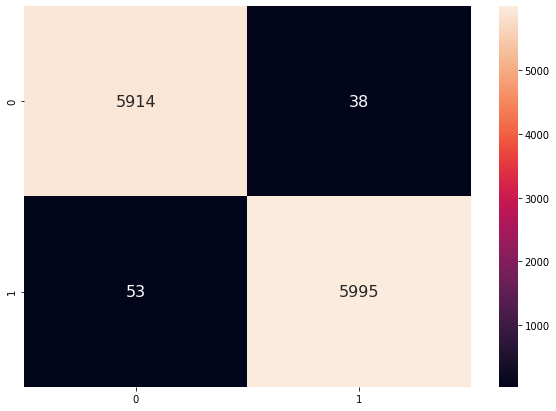

Extra Tree classification report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5967
           1       0.99      0.99      0.99      6033

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [ ]:
#This is for 100 DT withput CV
print('Extra Tree accuracy score: ',accuracy_score(y_test,y_extc))
print('Extra Tree confusion matrix heatmap: \n')
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_extc, y_test),annot=True, annot_kws={"size": 16},fmt = "d")
plt.show()
print('Extra Tree classification report \n',classification_report(y_test, y_extc))